<a href="https://colab.research.google.com/github/mariajosemuskusl/Integracion-de-Datos-y-Prospectiva/blob/main/Reto_1_Caracterizaci%C3%B3n_Variables_Aleatorias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reto 1**

**Caracterización Variables Aleatorias** | **FINTECH**

---
María José Muskus Londoño





**Caso de estudio**

* Se plantea el análisis de las pérdidas asociadas al riesgo derivado de las operaciones de una FINTECH, en particular aquellas originadas por fallos tecnológicos en transacciones realizadas por clientes a través de canales electrónicos.

**Objetivo del negocio**

* Estimar las pérdidas vinculadas al riesgo operacional derivado de fallas tecnológicas en dichos canales, con el fin de dimensionar su impacto y apoyar la gestión del riesgo.

**Abstracción**

* Estimación de pérdidas esperadas, no esperadas y catastróficas.

* Análisis de medidas estadísticas de la distribución agregada: media, varianza, coeficiente de asimetría y curtosis.


---


* **Frecuencia:** número de fallas electrónicas reportadas por los usuarios diariamente.

* **Severidad:** costo asociado a la solución de cada evento de riesgo en millones.

* **Distribución agregada de pérdidas (LDA):** resultado del producto entre frecuencia y severidad.

**0. Cargar las Librerías de Trabajo**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns #Trabajo Estadístico
import matplotlib.pyplot as plt #Gráficos

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Cargar los Archivos de Trabajo**

In [ ]:
nxl='/content/drive/MyDrive/University/Integración de Datos y Prospectiva/Retos/Reto 1/1. FallasTecnológicas.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(10)

,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas (Freq),Valor Generado Promedio (Millones),Descripción Evento
0,2009-01-01,80,14.8058,1,0.5374,"Errores visuales menores, problemas de usabili..."
1,2009-01-02,105,56.4721,4,1.1978,"Errores en la interfaz de usuario, fallas en f..."
2,2009-01-03,70,9.9760,5,0.4269,"Errores visuales menores, problemas de usabili..."
3,2009-01-04,105,18.2949,6,1.0814,"Errores en la interfaz de usuario, fallas en f..."
4,2009-01-05,130,23.4112,7,1.2105,"Errores en la interfaz de usuario, fallas en f..."
5,2009-01-06,100,31.5177,3,0.2363,"Errores visuales menores, problemas de usabili..."
6,2009-01-07,115,29.5603,1,0.2737,"Errores visuales menores, problemas de usabili..."
7,2009-01-08,90,36.4063,8,12.4245,"Caída total del sistema por más de 24 horas, p..."
8,2009-01-09,105,9.3552,1,2.3869,"Degradación del rendimiento por varias horas, ..."
9,2009-01-10,85,23.7019,7,0.3098,"Errores visuales menores, problemas de usabili..."


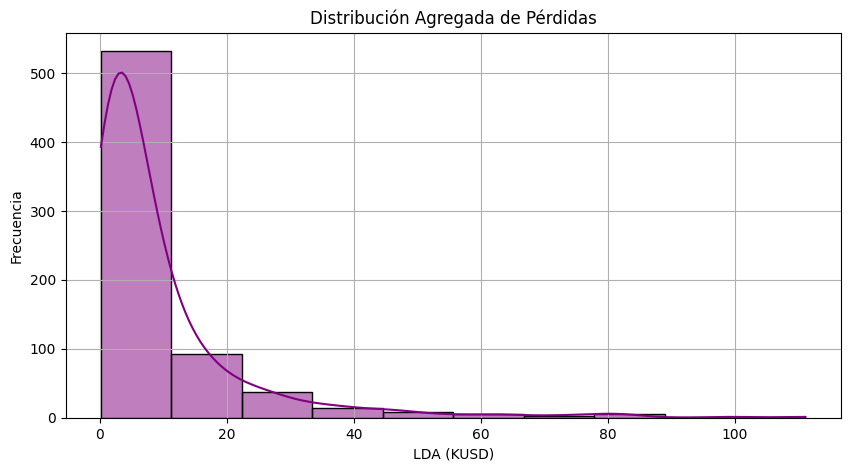

In [ ]:
#Tomamos las variables de interés
Freq=XDB.iloc[1:,3].astype(float)
Sev=XDB.iloc[1:,4].astype(float)
LDA=Freq*Sev

#Construcción de la distribución agregada de las pérdidas
plt.figure(figsize=(10,5))
sns.histplot(LDA,bins=10,kde=True, color='purple')
plt.title("Distribución Agregada de Pérdidas")
plt.xlabel("LDA (KUSD)")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

**2. Clusterización estadística.**

La clusterización estadística está definida por el histograma de frecuencias.

In [ ]:
np.set_printoptions(suppress=True, precision=3)
NI=10 #Indica el número de clusters

counts, bin_edges=np.histogram(LDA,bins=NI)
print("El número de datos por intervalo es:")
print(counts)

print ("Los intervalos inferiores:")
print(bin_edges[:-1])

print("Los intervalos superiores:")
print(bin_edges[1:])

XC=(bin_edges[:-1]+bin_edges[1:])/2

#Se configura la tabla de los datos
Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
df=pd.DataFrame(Tabla,columns=['Límite Inferior','Límite Superior','Centroide','ND'])
df.head(10)

El número de datos por intervalo es:
[532  93  37  14   9   5   3   5   1   1]
Los intervalos inferiores:
[ 0.142 11.236 22.33  33.425 44.519 55.613 66.707 77.801 88.895 99.989]
Los intervalos superiores:
[ 11.236  22.33   33.425  44.519  55.613  66.707  77.801  88.895  99.989
 111.083]


,Límite Inferior,Límite Superior,Centroide,ND
0,0.14230,11.23637,5.689335,532.0
1,11.23637,22.33044,16.783405,93.0
2,22.33044,33.42451,27.877475,37.0
3,33.42451,44.51858,38.971545,14.0
4,44.51858,55.61265,50.065615,9.0
5,55.61265,66.70672,61.159685,5.0
6,66.70672,77.80079,72.253755,3.0
7,77.80079,88.89486,83.347825,5.0
8,88.89486,99.98893,94.441895,1.0
9,99.98893,111.08300,105.535965,1.0


**3. Métricas Estadísticas de Tendencia Central y Dispersión**

Media, Desviación, Asimetría y Kurtosis

In [ ]:
u=np.mean(LDA)
var=np.var(LDA)
sigma=np.std(LDA)

T2=np.column_stack((u,var,sigma))
df2=pd.DataFrame(T2,columns=['Media','Varianza','Desviación'])
df2.head(1)

from scipy.stats import skew, kurtosis

#Calculate Skewness
lda_skew=skew(LDA)

#Calculate Kurtosis
lda_kurtosis=kurtosis(LDA)

#Optionally, add to the DataFrame with other metrics
df2_temp = df2.copy()
df2_temp['Asimetria']=lda_skew
df2_temp['Kurtosis']=lda_kurtosis

display(df2_temp)

,Media,Varianza,Desviación,Asimetria,Kurtosis
0,9.463847,188.049529,13.713115,3.346612,14.151264


**Análisis de Resultados**



A partir de las medidas de tendencia central y dispersión se observa que la mayoría de las pérdidas se ubican en valores por debajo de la media (9.463847). El coeficiente de asimetría (3.346612) se ubica por encima de la unidad e indica que la distribución está sesgada hacia la derecha, lo que sugiere que la mayor parte de los fallos tecnológicos generan pérdidas pequeñas, asociadas a pérdidas esperadas. El coeficiente de curtosis (14.151264) respalda la idea de menores pérdidas, mostrando una concentración de los datos al lado izquierdo de la media de la distribución de las pérdidas.

El análisis por intervalos permite observar que la mayor cantidad de datos se concentra en los primeros rangos de pérdidas y disminuye a medida que el monto aumenta. Esto evidencia un riesgo operacional caracterizado principalmente por pérdidas pequeñas, aunque con algunos eventos extremos que deben considerarse dentro de la gestión del riesgo de la compañía.